****


## **Chinelo Osuji**
**Broward College**

[LinkedIn](https://linkedin.com/in/chineloosuji/)

****

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

****

# **Analysis of CPI for All Urban Consumers: Energy Services in South Florida**

****

****


### **Seasonal Decomposition of Time Series by Loess (STL)**


****

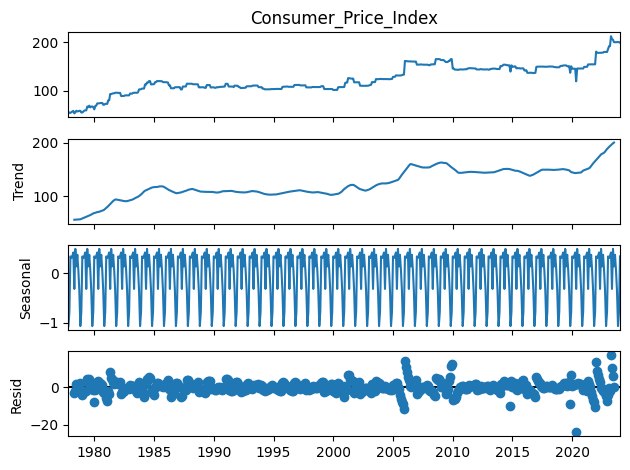

In [ ]:
result = seasonal_decompose(CPI['Consumer_Price_Index'], model='add')
result.plot();

****


**From the time series decomposition, we can conclude that there is a seasonal pattern and a upward trend in the CPI.**

**There are also some events, observed in the residuals component, that have caused fluctuations in the CPI that are not captured by the seasonal or trend components.**



****

****


### **Autocorrelation Function (ACF) Plot**


$ \rho(k) = \frac{\sum_{t=k+1}^{T}(Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_{t=1}^{T}(Y_t - \bar{Y})^2} $  
where:  
$\rho(k)$ is the autocorrelation function at lag $k$, which measures the linear relationship between values of the time series separated by $k$ time units.  
$k$ is the lag number, representing the distance or number of time steps separating the two series values being compared.  
$T$ is the total number of observations in the time series, indicating the length or the total number of time points for which data are available.  
$Y_t$ is the observed value of the time series at time $t$, where $t$ indicates a specific time point in the series.  
$Y_{t-k}$ is the observed value of the time series at time $t$ minus lag $k$, meaning it's the value observed at $k$ time units before time $t$.  
$\bar{Y}$ is the mean (average) value of the time series $Y$, calculated as the sum of all observed values divided by the number of observations, representing a central or typical value in the dataset.





****

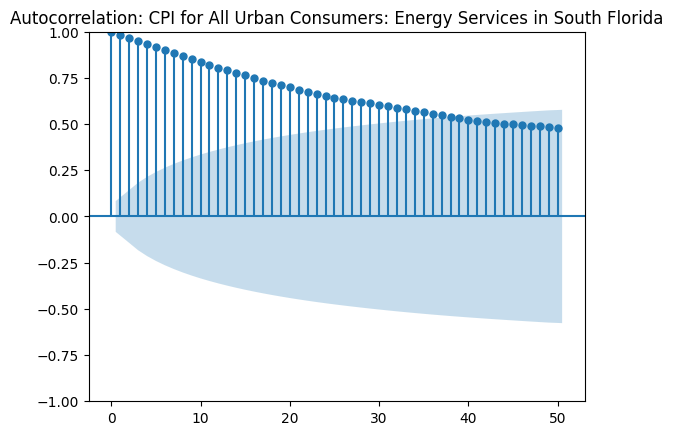

In [ ]:
title = 'Autocorrelation: CPI for All Urban Consumers: Energy Services in South Florida'
lags = 50
plot_acf(CPI['Consumer_Price_Index'],title=title,lags=lags);

****

**The autocorrelation is high and positive at short lag times. This shows that the CPI value in one period is a good predictor of the CPI value in the next period.**

**The autocorrelation coefficients gradually decrease as the lag increases. This makes sense because the influence of a given CPI value on future values can weaken over time.**

**The slow decay of autocorrelation over time shows that the CPI data has a long memory. This means past values could affect future values even at longer lags.**





****

****


### **Partial Autocorrelation Function (PACF) Plot**


$ \phi_{kk} = \rho(k) - \sum_{j=1}^{k-1}\phi_{k-1,j}\rho(k-j) $  
where:  
$\phi_{kk}$ is the partial autocorrelation at lag $k$, which measures the extent of a linear relationship between the time series and its own lagged values at lag $k$, after accounting for the linear relationships explained by all intervening lags (1 to $k-1$).  
$\rho(k)$ is the autocorrelation at lag $k$, reflecting the direct correlation between the series and its lagged version at $k$ time steps apart without controlling for other lags.  
$k$ is the lag number, indicating the number of time steps separating the series and its lagged version.  
$j$ indexes the summation from $1$ to $k-1$, where $j$ represents the intermediate lags that are accounted for to isolate the unique contribution of the lag $k$.  
$\phi_{k-1,j}$ is the PACF coefficient for the $j$th lag in the $(k-1)$th order model, representing the unique correlation of the series with its lagged value at $j$, independent of the correlations at all shorter lags.  
$\rho(k-j)$ is the autocorrelation for the time series at lag $k-j$, showing the direct correlation between the series values separated by $k-j$ time steps, used as a part of the adjustment in PACF to remove the effects of intervening lags.




****

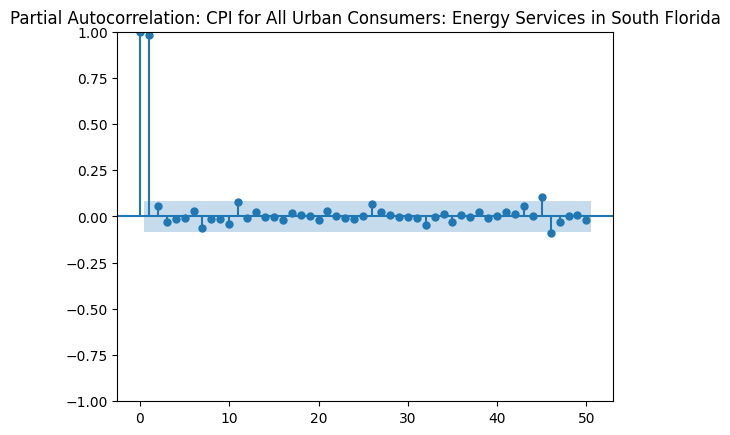

In [ ]:
title = 'Partial Autocorrelation: CPI for All Urban Consumers: Energy Services in South Florida'
lags = 50
plot_pacf(CPI['Consumer_Price_Index'],title=title,lags=lags);

****


**The PACF shows a significant spike at lag 1, which is well above the confidence interval bounds. This shows that there is a strong partial autocorrelation at lag 1.**

**The partial autocorrelations for lags after the first lag fall inside the confidence interval, which is the blue shaded area in the plot. This shows that these lags do not have a significant influence on future values of the series once the effect of the first lag is accounted for.**

**The fact that the partial autocorrelation is significant at the first lag and then cuts off suggests that an autoregressive model of order 1 (AR(1)) might be a good fit.**




****